In [38]:
from pandas_datareader import data 
import matplotlib.pyplot as plt    
import pandas as pd                
%matplotlib inline

# 讀取台積電股票數據

In [39]:
dataset = data.DataReader("2330.TW", "yahoo", "2000-01-01","2018-01-01")
dataset.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,69.649002,68.475197,69.649002,69.649002,2.006623e+11,39.525471
2000-01-05,71.214104,68.866302,69.649002,71.214104,4.024668e+11,40.413666
2000-01-06,71.214104,69.649002,70.822899,69.649002,1.975457e+11,39.525471
2000-01-07,68.475197,66.518600,67.301300,67.692497,2.352703e+11,38.415165
2000-01-10,70.431396,68.475197,69.649002,70.040199,2.761717e+11,39.747475


# 取出調整後收盤價 並畫出曲線

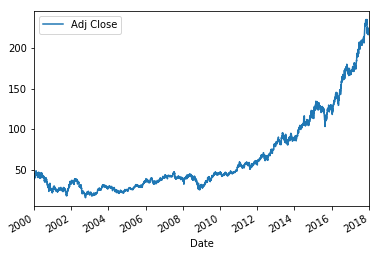

In [40]:
stock = dataset['Adj Close']
stock.plot(label='Adj Close')
plt.legend(loc='upper left')

# 1.畫出10天移動平均線 又稱為短線或雙週線

### min_periods=1 是說明在10天內
### 只要其中有一天有資料就能算平均
### 不會因為股市放假 導致有NaN資料而無法計算的情形

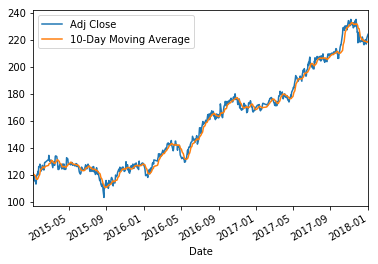

In [88]:
stock_10 = stock.rolling(10, min_periods=1).mean()

stock['2015':].plot(label='Adj Close')
stock_10['2015':].plot(label='10-Day Moving Average')
plt.legend(loc='upper left')

# 建立回測系統
### 策略：只要當天收盤價小於近10天平均價 則在收盤瞬間買

In [54]:
signal = (stock < stock_10)

### 將策略套用在每一天 並且畫出成長率
#### stock.shift(-1) 為明天 stock 為今天  stock.shift(-1) / stock為今天相較於明天的成長率
#### [signal] 為套用策略
#### comproud() 為將每一天成長率連乘

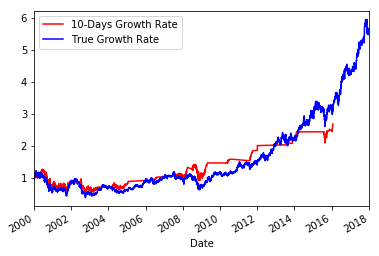

In [89]:
(stock.shift(-1) / stock)[signal].cumprod().plot(color='red',label='10-Days Growth Rate')
(stock.shift(-1) / stock).cumprod().plot(color='blue',label='True Growth Rate')
plt.legend(loc='upper left')

### 成長率高達兩倍 因10天移動平均線 能快速反映價格變化

In [56]:
performance = pd.DataFrame({'stock_TSMC':stock, 'stock_10':stock_10, '增長率':stock.shift(-1)/stock, 'signal':signal})

# 以表格呈現數據及策略的布林值

In [60]:
perfor = performance["2017-01-01":]
perfor.head()

,signal,stock_10,stock_TSMC,增長率
Date,,,,
2017-01-03,False,168.628296,170.869202,1.000000
2017-01-04,False,168.674982,170.869202,1.002732
2017-01-05,False,169.001781,171.336060,1.002725
2017-01-06,False,169.468636,171.802902,1.000000
2017-01-09,False,169.982176,171.802902,1.000000


# 嘗試不同天數的移動平均線

# 2.使用20天移動平均線 又稱為中線或月線

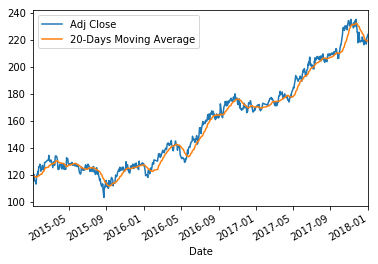

In [90]:
stock_20 = stock.rolling(20, min_periods=1).mean()

stock['2015':].plot(label='Adj Close')
stock_20['2015':].plot(label='20-Days Moving Average')
plt.legend(loc='upper left')

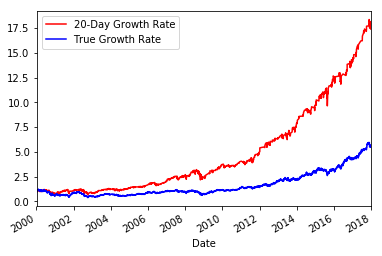

In [91]:
signal = (stock < stock_20)

(stock.shift(-1) / stock)[signal].cumprod().plot(color='red',label='20-Day Growth Rate')
(stock.shift(-1) / stock).cumprod().plot(color='blue',label='True Growth Rate')
plt.legend(loc='upper left')

# 3.使用60天移動平均線 又稱為中線或季線

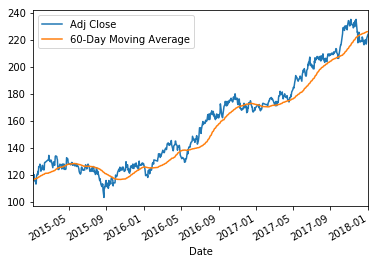

In [92]:
stock_60 = stock.rolling(60, min_periods=1).mean()

stock['2015':].plot(label='Adj Close')
stock_60['2015':].plot(label='60-Day Moving Average')
plt.legend(loc='upper left')

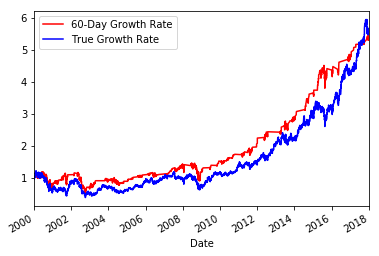

In [93]:
signal = (stock < stock_60)

(stock.shift(-1) / stock)[signal].cumprod().plot(color='red',label='60-Day Growth Rate')
(stock.shift(-1) / stock).cumprod().plot(color='blue',label='True Growth Rate')
plt.legend(loc='upper left')

# 4.使用120天移動平均線 又稱為中線或半年線

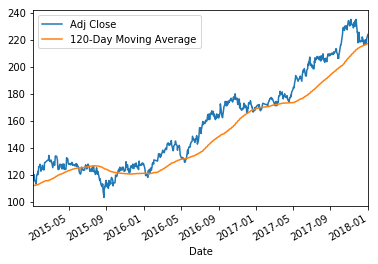

In [94]:
stock_120 = stock.rolling(120, min_periods=1).mean()

stock['2015':].plot(label='Adj Close')
stock_120['2015':].plot(label='120-Day Moving Average')
plt.legend(loc='upper left')

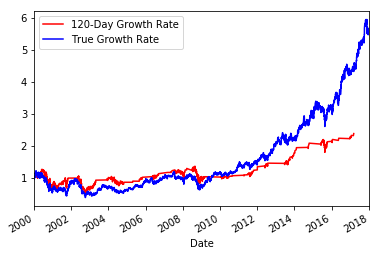

In [95]:
signal = (stock < stock_120)

(stock.shift(-1) / stock)[signal].cumprod().plot(color='red',label='120-Day Growth Rate')
(stock.shift(-1) / stock).cumprod().plot(color='blue',label='True Growth Rate')
plt.legend(loc='upper left')

# 5.使用240天移動平均線 又稱為中線或年線

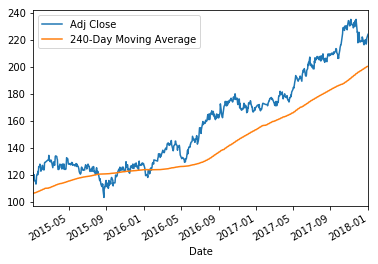

In [96]:
stock_240 = stock.rolling(240, min_periods=1).mean()

stock['2015':].plot(label='Adj Close')
stock_240['2015':].plot(label='240-Day Moving Average')
plt.legend(loc='upper left')

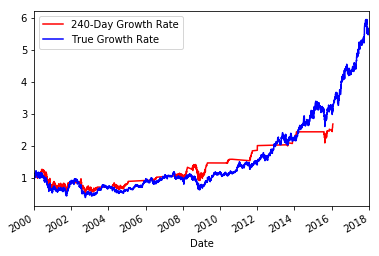

In [97]:
signal = (stock < stock_240)

(stock.shift(-1) / stock)[signal].cumprod().plot(color='red',label='240-Day Growth Rate')
(stock.shift(-1) / stock).cumprod().plot(color='blue',label='True Growth Rate')
plt.legend(loc='upper left')

# 最後結果顯示使用20天移動平均線做買入的成長率高達17.5％
# 結論為若要用此策略對台積電股票進行買入的動作
# 推薦使用20天平均線！